In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')

In [3]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [5]:
def datacleaning(x):
    y=nltk.word_tokenize(x)
    temp=[]
    for i in y:
      if i in stopwords.words("english"): 
         pass
      else:
         temp.append(i)
    my_new_string=' '.join(temp)
    c=nltk.word_tokenize(my_new_string)
    my_list=[]
    for i in c:
        my_list.append(lemmatizer.lemmatize(i))
        my_new_string_second=' '.join(my_list)
        temp=[]
    for i in my_new_string_second:
      if i.isdigit(): 
         pass
      else:
        temp.append(i)
    hi=''.join(temp)
    return (hi.lower()) 

In [6]:
df['Review_new'] = df['Review'].apply(datacleaning)

In [7]:
x = df['Review_new']

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

vectorizer.fit(x)                    

CountVectorizer()

In [9]:
vectorizer.get_feature_names_out()[0:100]

array(['absolute', 'absolutely', 'absolutley', 'accident',
       'accommodation', 'accomodate', 'accordingly', 'accountant', 'ache',
       'acknowledged', 'across', 'actual', 'actually', 'added',
       'affordable', 'after', 'afternoon', 'again', 'ago', 'ahead',
       'airline', 'airport', 'ala', 'albondigas', 'all', 'allergy',
       'almond', 'almost', 'alone', 'also', 'although', 'always',
       'amazing', 'ambiance', 'ambience', 'amount', 'ample', 'an', 'and',
       'andddd', 'angry', 'annoying', 'another', 'anticipated', 'any',
       'anymore', 'anyone', 'anything', 'anytime', 'anyway', 'anyways',
       'apart', 'apologize', 'apology', 'app', 'appalling', 'apparently',
       'appealing', 'appetite', 'appetizer', 'appetizers', 'apple',
       'approval', 'are', 'area', 'arepas', 'aria', 'around', 'array',
       'arrived', 'arrives', 'arriving', 'article', 'as', 'ask', 'asked',
       'asking', 'assure', 'at', 'ate', 'atmosphere', 'atrocious',
       'attached', 'attack', 

In [10]:
vectorizer.transform(x)

<1000x1846 sparse matrix of type '<class 'numpy.int64'>'
	with 6005 stored elements in Compressed Sparse Row format>

In [11]:
X_vectors = vectorizer.transform(x)

vectorizer.get_feature_names_out()

from sklearn.cluster import KMeans
import numpy as np

km = KMeans(n_clusters=20)

km_model = km.fit(X_vectors)

y_km = km.predict(X_vectors)

y_km

array([ 6, 18, 19, 19,  7, 19, 19,  7,  7, 19,  8, 15,  7, 19, 19, 19, 19,
        8,  6, 19,  7, 16,  8,  7, 19, 18, 19, 17, 16,  7, 19, 17,  6,  6,
        6,  7, 18,  8, 19,  8,  7, 18,  0,  8, 19,  7, 13, 18, 15, 19,  9,
       19, 18, 16,  7, 16,  7, 19,  7,  7, 19,  6,  7, 15,  6,  8, 19, 15,
        9, 19,  7, 18,  7, 13,  6,  7,  8, 18, 18, 18, 12,  6,  7,  6,  7,
       19,  7, 16, 19, 19, 19, 13,  1, 19, 19,  9, 15, 16, 18, 18, 19, 18,
       19, 19, 17, 19, 16,  7, 15, 18, 18, 16, 17, 19, 18, 19, 13, 19, 19,
        6,  6,  8,  8,  6,  6, 19,  6,  8, 19, 19,  6, 19, 18,  7, 18, 18,
       19, 17, 19, 19, 19,  7, 11, 19, 16,  7, 16, 16, 19,  9, 19, 17,  9,
       19, 19, 19, 19,  2,  6, 19, 15, 19, 19, 19,  1, 19,  6, 18, 19, 19,
        9, 17,  7, 19, 19, 15,  7,  7,  6,  9,  7, 15, 19, 13,  6, 19, 16,
       19, 19, 18, 16, 19, 19, 19, 19,  6,  7, 19, 19, 13,  6, 16,  7, 19,
        8, 18,  6,  7,  6,  7, 19, 12, 19, 15, 19, 18, 18,  7, 19, 16,  7,
        7, 19, 19, 13, 19

In [12]:
km.labels_

km.cluster_centers_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00260417, 0.00520833, 0.00260417, ..., 0.        , 0.01041667,
        0.        ]])

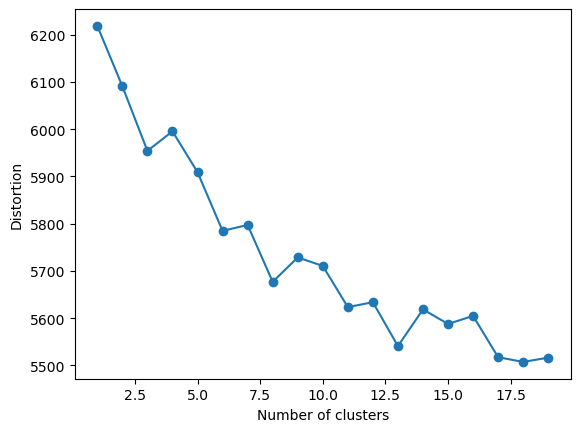

In [13]:
import matplotlib.pyplot as plt

distortions = []
for i in range(1, 20):
    km = KMeans(
        n_clusters=i
    )
    km.fit(X_vectors)
    distortions.append(km.inertia_)

plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [14]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

In [15]:
df.head()

,Review,Liked,Review_new
0,Wow... Loved this place.,1,wow ... loved place .
1,Crust is not good.,0,crust good .
2,Not tasty and the texture was just nasty.,0,not tasty texture nasty .
3,Stopped by during the late May bank holiday of...,1,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,the selection menu great price .


In [16]:
df.isna() 

,Review,Liked,Review_new
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
995,False,False,False
996,False,False,False
997,False,False,False
998,False,False,False


In [17]:
df['Review_new'].isna().index

RangeIndex(start=0, stop=1000, step=1)

In [18]:
df.drop(df[df['Review_new'].isna()].index)

,Review,Liked,Review_new
0,Wow... Loved this place.,1,wow ... loved place .
1,Crust is not good.,0,crust good .
2,Not tasty and the texture was just nasty.,0,not tasty texture nasty .
3,Stopped by during the late May bank holiday of...,1,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,the selection menu great price .
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food flavor texture lacking .
996,Appetite instantly gone.,0,appetite instantly gone .
997,Overall I was not impressed and would not go b...,0,overall i impressed would go back .
998,"The whole experience was underwhelming, and I ...",0,"the whole experience underwhelming , i think '..."


In [19]:
df_clean = df.drop(df[df['Review_new'].isna()].index)

In [20]:
df_clean

,Review,Liked,Review_new
0,Wow... Loved this place.,1,wow ... loved place .
1,Crust is not good.,0,crust good .
2,Not tasty and the texture was just nasty.,0,not tasty texture nasty .
3,Stopped by during the late May bank holiday of...,1,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,the selection menu great price .
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food flavor texture lacking .
996,Appetite instantly gone.,0,appetite instantly gone .
997,Overall I was not impressed and would not go b...,0,overall i impressed would go back .
998,"The whole experience was underwhelming, and I ...",0,"the whole experience underwhelming , i think '..."


In [24]:
df_clean['Review_new'].values 

array(['wow ... loved place .', 'crust good .',
       'not tasty texture nasty .',
       'stopped late may bank holiday rick steve recommendation loved .',
       'the selection menu great price .',
       'now i getting angry i want damn pho .',
       "honeslty n't taste that fresh . )",
       'the potato like rubber could tell made ahead time kept warmer .',
       'the fry great .', 'a great touch .', 'service prompt .',
       'would go back .',
       'the cashier care ever i say still ended wayyy overpriced .',
       'i tried cape cod ravoli , chicken , cranberry ... mmmm !',
       'i disgusted i pretty sure human hair .',
       'i shocked sign indicate cash .', 'highly recommended .',
       'waitress little slow service .',
       'this place worth time , let alone vegas .', 'like .',
       'the burrittos blah !', 'the food , amazing .',
       'service also cute .',
       'i could care le ... the interior beautiful .', 'so performed .',
       "that 's right .... red 

In [25]:
type(df_clean['Review_new'].values)

numpy.ndarray

In [22]:
df_clean.shape

(1000, 3)

In [23]:
str(df_clean['Review_new'].values)

'[\'wow ... loved place .\' \'crust good .\' \'not tasty texture nasty .\'\n \'stopped late may bank holiday rick steve recommendation loved .\'\n \'the selection menu great price .\'\n \'now i getting angry i want damn pho .\'\n "honeslty n\'t taste that fresh . )"\n \'the potato like rubber could tell made ahead time kept warmer .\'\n \'the fry great .\' \'a great touch .\' \'service prompt .\' \'would go back .\'\n \'the cashier care ever i say still ended wayyy overpriced .\'\n \'i tried cape cod ravoli , chicken , cranberry ... mmmm !\'\n \'i disgusted i pretty sure human hair .\' \'i shocked sign indicate cash .\'\n \'highly recommended .\' \'waitress little slow service .\'\n \'this place worth time , let alone vegas .\' \'like .\'\n \'the burrittos blah !\' \'the food , amazing .\' \'service also cute .\'\n \'i could care le ... the interior beautiful .\' \'so performed .\'\n "that \'s right .... red velvet cake ..... ohhh stuff good ."\n \'- they never brought salad asked .\'\

In [26]:
len(str(df_clean['Review_new'].values))

46277

In [27]:
text_array = df_clean['Review_new'].values 

In [28]:
text = str(text_array)

In [29]:
text

stopwords = set(STOPWORDS)

stopwords

WordCloud(background_color="white").generate(text)

wordcloud = WordCloud(background_color="white").generate(text)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(text))

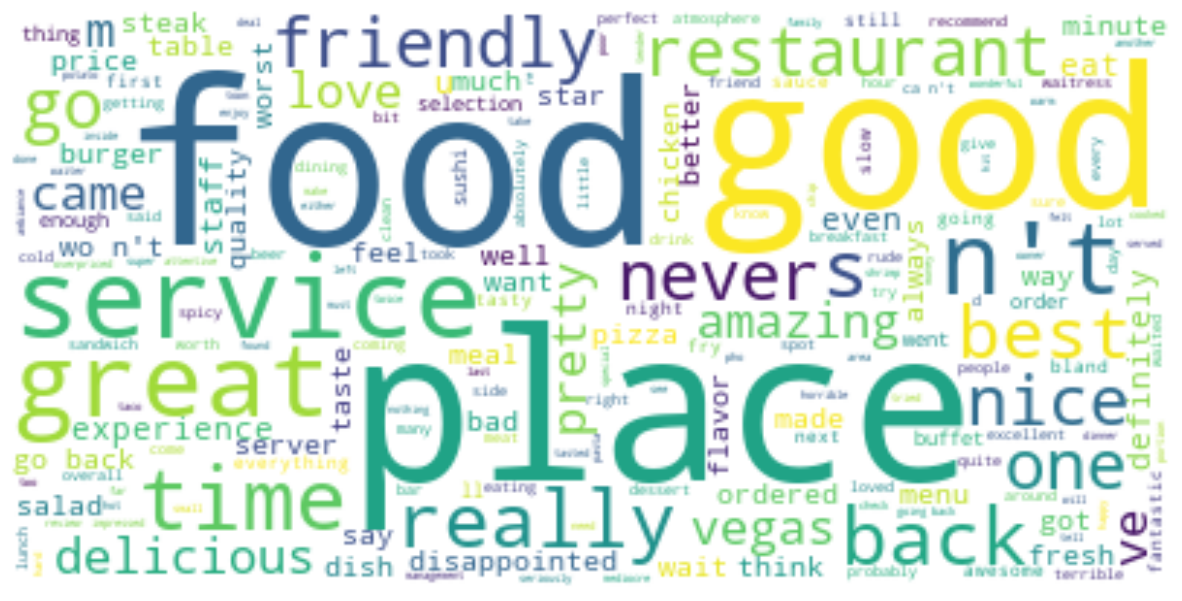

In [54]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [55]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

In [61]:
with open('Harry_potter_the_Philosopher_Stone.txt', 'r', encoding='utf-8') as file:
    harry_potter_text = file.read().replace('\n', '')

In [63]:
len(harry_potter_text)

245259

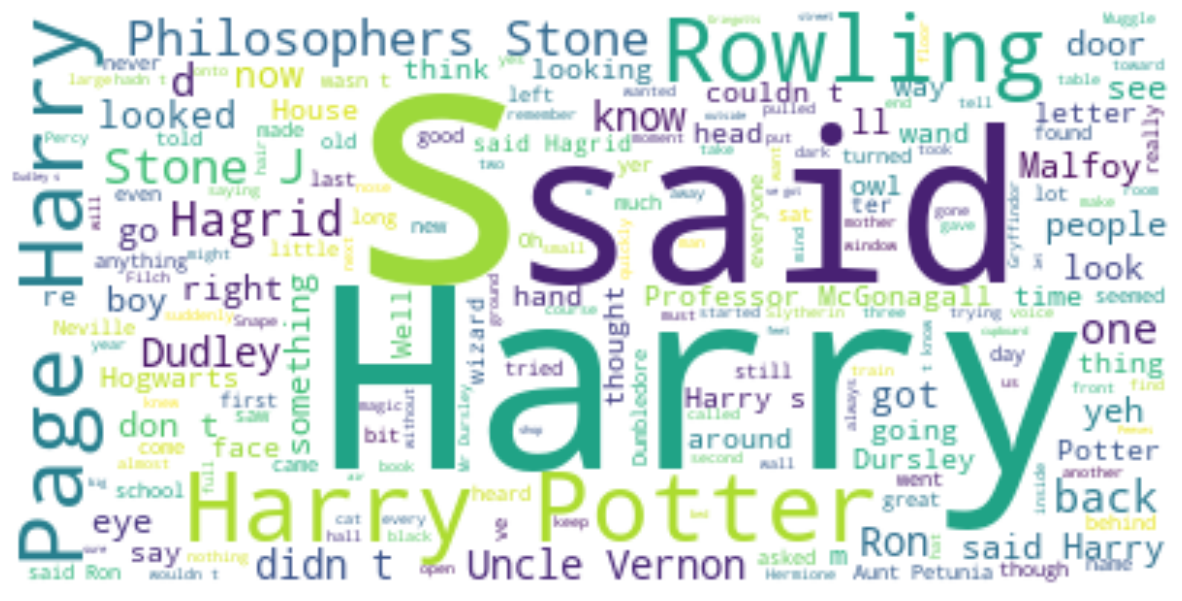

In [64]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(harry_potter_text))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()